In [2]:
include("src/Sim.jl")

Main.Sim

In [3]:
using DifferentialEquations
using Plots
using .Sim

In [22]:
@model model1 begin
    @parameter a 
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Gain = GainBlock(a)
    @blk Constant = ConstantBlock(30)
    @blk Add = AddBlock([:+, :+, :+]) inport[1]:in1 inport[2]:in2 inport[3]:in3
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => Gain
    @connect Gain => Out1
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant => in3
    @connect Add => Out2
    
end

model1 (generic function with 1 method)

In [23]:
@model model2 begin
    @parameter a  k j
    
    @blk Ramp1 = RampBlock(slope=k, starttime=0, initialoutput=0) outport:d_k
    @blk Ramp2 = RampBlock(slope=j, starttime=0, initialoutput=0) outport:d_j
    @blk M1 = model1(a=a) inport[1]:in1 inport[2]:in2 outport[1]:out1 outport[2]:out2
    
    @connect d_k => in1
    @connect d_j => in2
end

model2 (generic function with 1 method)

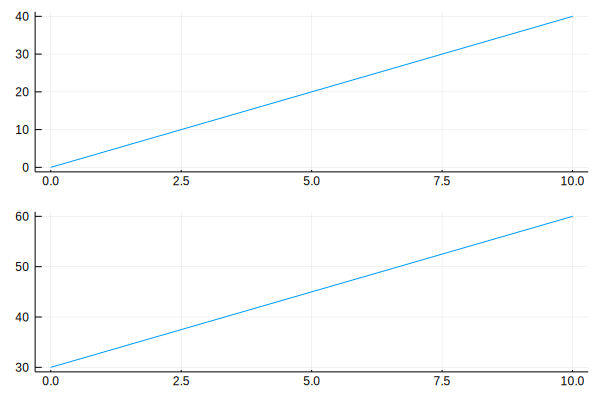

In [24]:
m = model2(a=4, k=1, j=2)
sol = @simulate(m, tspan = (0.0, 10.0), scope=[out1, out2])
sol.graph

In [4]:
@model Model1 begin
    @parameter a
    
    @blk In = InBlock()
    @blk Gain = GainBlock(a)
    
    @connect In => Gain
end

Model1 (generic function with 1 method)